<a href="https://colab.research.google.com/github/SwathiS2823/SCT_DS_2/blob/main/DSTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Kaggle
%pip install kaggle

# Upload kaggle.json API token
from google.colab import files
files.upload()  # Upload your kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"snswathi","key":"6b86563333b6cf839605f2bb4ff7ea29"}'}

In [ ]:
# Create Kaggle folder and move the API key there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download -d gpreda/covid-world-vaccination-progress

# Unzip the dataset
!unzip covid-world-vaccination-progress.zip


Dataset URL: https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress
License(s): CC0-1.0
  0% 0.00/1.94M [00:00<?, ?B/s]
100% 1.94M/1.94M [00:00<00:00, 681MB/s]
Archive:  covid-world-vaccination-progress.zip
  inflating: country_vaccinations.csv  
  inflating: country_vaccinations_by_manufacturer.csv  


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("country_vaccinations.csv")

# Show first few rows
df.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
# Check for null values
df.isnull().sum()

# Fill missing numeric values with median
df['total_vaccinations'] = df['total_vaccinations'].fillna(df['total_vaccinations'].median())
df['people_vaccinated'] = df['people_vaccinated'].fillna(df['people_vaccinated'].median())
df['people_fully_vaccinated'] = df['people_fully_vaccinated'].fillna(df['people_fully_vaccinated'].median())

# Drop rows with missing country or date
df = df.dropna(subset=['country', 'date'])

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])


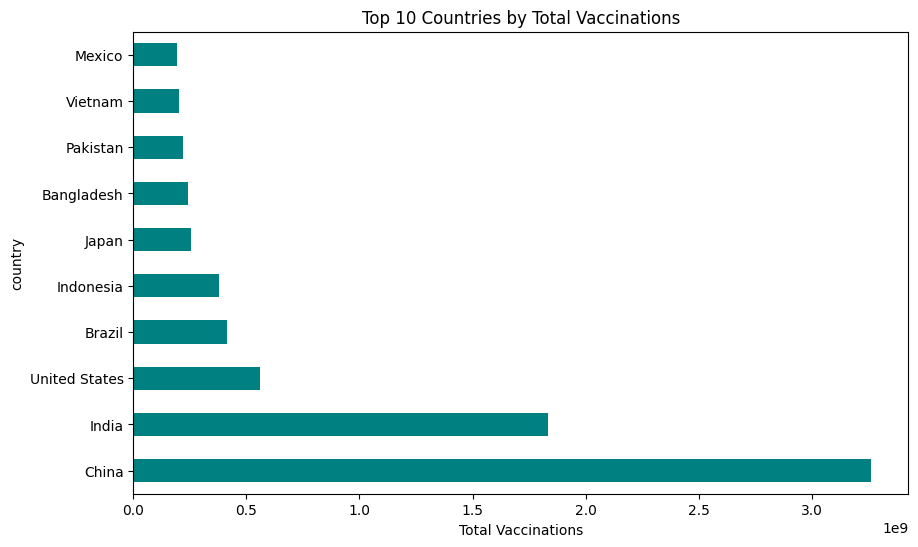

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total vaccinations by country (top 10)
top_vaccinated = df.groupby('country')['total_vaccinations'].max().sort_values(ascending=False).head(10)
top_vaccinated.plot(kind='barh', figsize=(10, 6), color='teal')
plt.title('Top 10 Countries by Total Vaccinations')
plt.xlabel('Total Vaccinations')
plt.show()


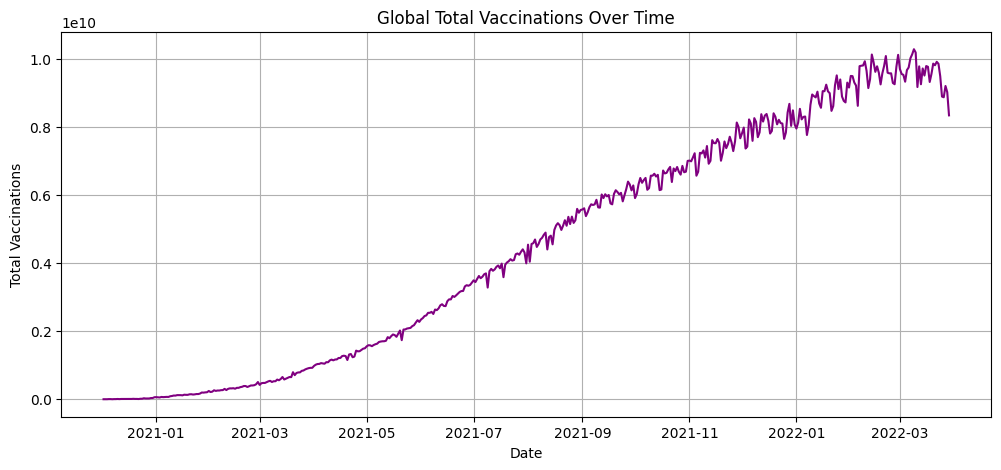

In [ ]:
# Vaccination trend over time (global)
global_trend = df.groupby('date')['total_vaccinations'].sum()

plt.figure(figsize=(12, 5))
plt.plot(global_trend, color='purple')
plt.title('Global Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.grid(True)
plt.show()


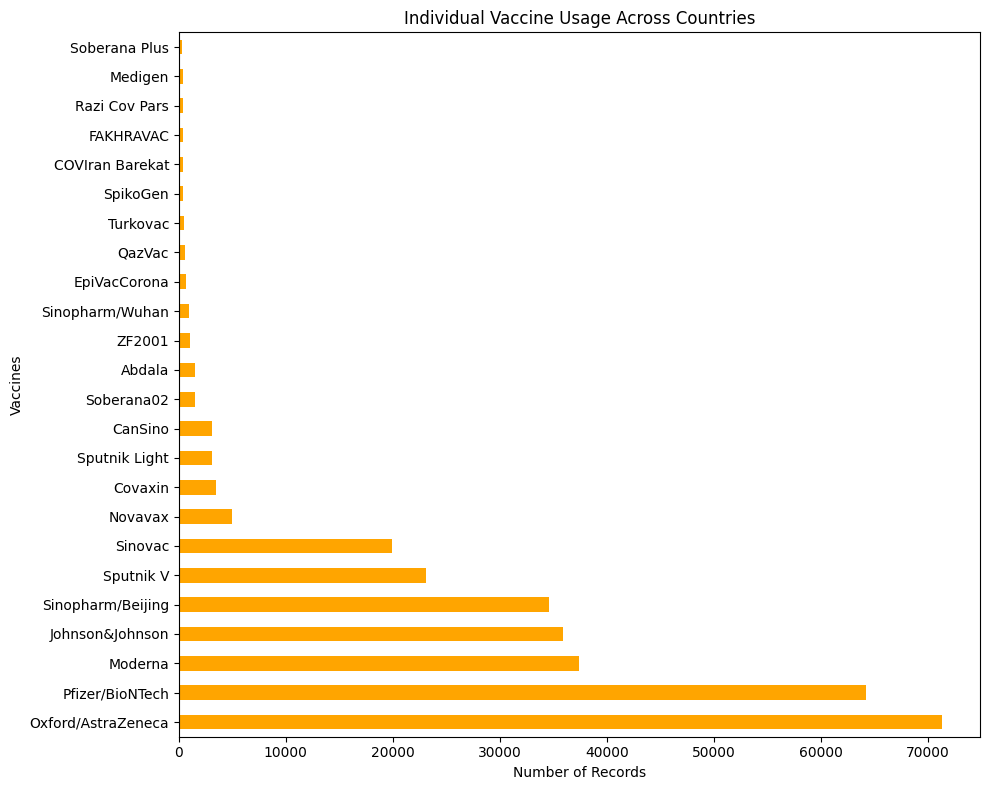

In [ ]:
# Split combined vaccine names into separate rows
df_exploded = df.copy()
df_exploded['vaccine'] = df_exploded['vaccines'].str.split(', ')
df_exploded = df_exploded.explode('vaccine')

# Count and plot individual vaccine usage
vaccine_counts = df_exploded['vaccine'].value_counts()

vaccine_counts.plot(kind='barh', figsize=(10, 8), color='orange')
plt.title('Individual Vaccine Usage Across Countries')
plt.xlabel('Number of Records')
plt.ylabel('Vaccines')
plt.tight_layout()
plt.show()